<a href="https://colab.research.google.com/github/stxfanix/ia/blob/main/acvtp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("dataset.csv")


Saving dataset.csv to dataset.csv


In [ ]:
df.shape

(43400, 12)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


edad debería ser entero

In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,42309.000000,42309.000000,42309.000000,42309.000000,42309.000000,40886.000000,42309.000000
mean,36316.482025,43.279350,0.095984,0.048737,104.789186,28.878604,0.018483
std,21075.359748,21.803304,0.294573,0.215320,43.448966,7.664070,0.134692
min,1.000000,1.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18013.000000,26.000000,0.000000,0.000000,77.570000,23.600000,0.000000
50%,36320.000000,45.000000,0.000000,0.000000,91.650000,28.000000,0.000000
75%,54526.000000,60.000000,0.000000,0.000000,112.260000,33.000000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


mínimo de edad no puede ser 0.8.
faltan datos de bmi


In [ ]:
columna_edad=df['age']
print(columna_edad)

0         3.0
1        58.0
2         8.0
3        70.0
4        14.0
         ... 
43395    10.0
43396    56.0
43397    82.0
43398    40.0
43399    82.0
Name: age, Length: 43400, dtype: float64


In [ ]:
#para encontrar los no enteros
no_enteros = df[df['age'] % 1 != 0]
print (no_enteros) #hay 1091 edades con coma de las 43400

          id  gender   age  hypertension  heart_disease ever_married  \
116     7559  Female  0.64             0              0           No   
129    22706  Female  0.88             0              0           No   
321    45238  Female  1.80             0              0           No   
323    61511  Female  0.32             0              0           No   
356    40639  Female  1.08             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43325  68126    Male  1.32             0              0           No   
43330  18634  Female  0.72             0              0           No   
43341  57592    Male  1.72             0              0           No   
43354  25158  Female  1.40             0              0           No   
43369  62703    Male  1.72             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi smoking_status  stroke  
116    children          Urban              83.82  24.

aca empieza el analisis para ver si se eliminan los numeros no enteros de las edades (#se eliminaron)

In [ ]:
#posibles borrados
#comparar que no enteros coinciden con las filas esas que tengan nan
if 'bmi' in no_enteros.columns and 'smoking_status' in no_enteros.columns:
    res = no_enteros[
        no_enteros['bmi'].isna() & no_enteros['smoking_status'].isna()]
    print(res)

res.shape[0]

          id  gender   age  hypertension  heart_disease ever_married  \
1813   38920    Male  0.48             0              0           No   
3415   49553    Male  1.88             0              0           No   
3516   11658    Male  1.08             0              0           No   
3537   32514    Male  1.80             0              0           No   
4765   32147    Male  1.32             0              0           No   
6069   12075    Male  0.88             0              0           No   
6342   49373  Female  0.16             0              0           No   
6375    2518    Male  1.40             0              0           No   
6541   15831  Female  1.72             0              0           No   
7386    7232  Female  0.24             0              0           No   
7742    2069  Female  1.40             0              0           No   
7964   10776    Male  1.72             0              0           No   
8212   23027    Male  1.16             0              0         

39

In [ ]:
#NO ENTEROS CON HIPERTENSION
if 'hypertension' in no_enteros.columns:
    res = no_enteros[no_enteros['hypertension'] == 1]
    print(res)
    print("no enteros con hipertension:",res.shape[0])
    #no es necesario correr este (lo puse de nuevo porque se habia borrado)

In [ ]:
#NO ENTEROS CON UN ATAQUE CARDIACO
if 'heart_disease' in no_enteros.columns:
    res = no_enteros[no_enteros['heart_disease'] == 1]
    print(res)
    print("no enteros que tuvieron un infarto: ",res.shape[0])
       #no es necesario correr este (lo puse de nuevo porque se habia borrado)

In [ ]:
#NIVEL DE GLUCOSA MAYOR A 180 EN LAS EDADES NO ENTERAS
if 'avg_glucose_level' in no_enteros.columns:

    res = no_enteros[no_enteros['avg_glucose_level'] > 180] #Condicion
    print(res)
    print("no enteros de avg_glucose_level superiores a 180: ",res.shape[0])
       #no es necesario correr este (lo puse de nuevo porque se habia borrado)

In [ ]:
#NIVEL DE GLUCOSA MENOR A 80
if 'avg_glucose_level' in no_enteros.columns:
    res = no_enteros[no_enteros['avg_glucose_level'] < 80] #condicion
    print(res)
    print("no enteros de avg_glucose_level inferiores a 80: ", res.shape[0])
     #no es necesario correr este (lo puse de nuevo porque se habia borrado)

In [ ]:
#eliminacion de filas de todos los numeros no enteros (1091)
indices_a_eliminar = df[df['age'] % 1 != 0].index
df = df.drop(indices_a_eliminar)
df.shape


(42309, 12)

In [ ]:
df.duplicated().sum() #comprobamos que no haya duplicados

0

In [ ]:
nulogenero_df=df[df["gender"].isna( )] #comprobamos que la variable género no tenga nan.
nulogenero_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
nuloedad_df=df[df["age"].isna( )]
nuloedad_df #comprobamos que la columna edad no tenga NaN.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
nulohipertension_df=df[df["hypertension"].isna( )]
nulohipertension_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
nulocardiopatia_df=df[df["heart_disease"].isna( )]
nulocardiopatia_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
nulocasado_df=df[df["ever_married"].isna( )]
nulocasado_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
nulotipotrabajo_df=df[df["work_type"].isna( )]
nulotipotrabajo_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
nuloresidencia_df=df[df["Residence_type"].isna( )]
nuloresidencia_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
nuloglucosa_df=df[df["avg_glucose_level"].isna( )]
nuloglucosa_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
nulobmi_df=df[df["bmi"].isna( )] #hay 1462 faltantes
nulobmi_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
95,31091,Male,34.0,0,1,Yes,Private,Urban,106.23,NaN,formerly smoked,0
113,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,NaN,never smoked,0
186,11999,Female,63.0,0,0,Yes,Govt_job,Rural,79.92,NaN,smokes,0
231,22470,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43317,2558,Female,62.0,0,1,Yes,Govt_job,Urban,72.29,NaN,never smoked,0
43339,10463,Female,76.0,0,0,No,Private,Rural,100.55,NaN,never smoked,1
43351,7580,Female,58.0,1,0,Yes,Private,Urban,99.29,NaN,NaN,0
43371,18119,Female,78.0,0,0,Yes,Private,Urban,182.45,NaN,formerly smoked,0


In [ ]:
nulofumador_df=df[df["smoking_status"].isna( )]
nulofumador_df#hay 13292 datos faltantes en la columna estado de fumar

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43382,35179,Female,9.0,0,0,No,children,Urban,68.49,16.8,NaN,0
43385,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
43389,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


In [ ]:
nuloACV_df=df[df["stroke"].isna( )]
nuloACV_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


ESTANDARIZACION DE LOS DATOS:

In [ ]:
df['age'] = df['age'].astype(int) #ya son todos enteros

In [23]:
#COMPROBACION DE QUE LAS EDADES SEAN VALIDAS
edades_menores= df[df['age'] < 0]
edades_mayores = df[df['age'] > 100]

print("menores a 0:")
print(edades_menores)

print("mayores a 100:")
print(edades_mayores)

invalidas_menores = (df['age'] < 0).sum()

invalidas_mayores= (df['age'] > 100).sum()

print(" menores a 0:", invalidas_menores)
print("mayores a 100:", invalidas_mayores)


#TODO EN ORDEN

menores a 0:
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
mayores a 100:
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
 menores a 0: 0
mayores a 100: 0


In [ ]:
generos=df['gender'].value_counts()
print (generos)
#los valores estan bien

gender
Female    25129
Male      17169
Other        11
Name: count, dtype: int64


In [18]:
trabajos=df['work_type'].value_counts()
print(trabajos) #se reemplaza children por Children para que sea del mismo modo todos

work_type
Private          24834
Self-employed     6793
Govt_job          5440
children          5065
Never_worked       177
Name: count, dtype: int64


In [20]:
#cambio de trabajos
df['work_type'] = df['work_type'].replace('children', 'Children')
#comprobacion
trabajos=df['work_type'].value_counts()
print(trabajos) #se reemplaza children por Children para que sea del mismo modo todos

work_type
Private          24834
Self-employed     6793
Govt_job          5440
Children          5065
Never_worked       177
Name: count, dtype: int64


revisar si se cambia o no el tipo

In [21]:
fumador=df['smoking_status'].value_counts()
print (fumador)#se pasa a mayusculas igual que el resto de categorias

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64


In [22]:
df['smoking_status'] = df['smoking_status'].replace({
    'never smoked': 'Never smoked',
    'formerly smoked': 'Formerly smoked',
    'smokes': 'Smokes'
})
#comprobamos
fumador=df['smoking_status'].value_counts()
print (fumador)


smoking_status
Never smoked       16053
Formerly smoked     7493
Smokes              6562
Name: count, dtype: int64


In [ ]:
bmiporglucosaalto=nulobmi_df[nulobmi_df["avg_glucose_level"]>100]
bmiporglucosaalto #la mitad de los datos faltantes de bmi son de personas con el nivel de glucosa alto
bmiyedad_df=nulobmi_df[["bmi","age"]]
bmiporedadalto_df=bmiyedad_df[bmiyedad_df["age"]>50]
bmiporedadalto_df  #2/3 de los datos faltantes de bmi son de personas con edad alta
bmiporacv_df=nulobmi_df[nulobmi_df["stroke"]==0]
bmiporacv_df #casi todos los datos faltantes de bmi son de personas que no tienen ACV.
bmiporgenero_df=nulobmi_df[nulobmi_df["gender"]=="Male"]
bmiporgenero_df#se reparte mitad y mitad
bmiporglucosaalto #la mitad de los datos faltantes de bmi son de personas con el nivel de glucosa alto


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
95,31091,Male,34.0,0,1,Yes,Private,Urban,106.23,NaN,formerly smoked,0
113,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,NaN,never smoked,0
231,22470,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,NaN,NaN,0
233,15649,Male,54.0,1,0,Yes,Private,Rural,198.69,NaN,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43258,61554,Female,45.0,1,0,Yes,Private,Rural,149.76,NaN,never smoked,0
43283,29575,Female,30.0,0,0,No,Self-employed,Urban,258.24,NaN,never smoked,0
43339,10463,Female,76.0,0,0,No,Private,Rural,100.55,NaN,never smoked,1
43371,18119,Female,78.0,0,0,Yes,Private,Urban,182.45,NaN,formerly smoked,0


In [ ]:
promediobmi=df["bmi"].mean()
promediobmi #promedio del bmi es 28,6
nonulobmi_df=df[df["bmi"].notna( )]


28.605038390004296

In [ ]:
fumarporedadalta_df=nulofumador_df[nulofumador_df["age"]<16] #
fumarporedadalta_df
#df['age'].fillna(0,inplace=True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,NaN,0
2,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
33,33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,NaN,0
35,26325,Male,14.00,0,0,No,Govt_job,Urban,82.34,31.6,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43369,62703,Male,1.72,0,0,No,children,Rural,81.38,17.8,NaN,0
43376,65913,Female,3.00,0,0,No,children,Rural,83.32,21.3,NaN,0
43382,35179,Female,9.00,0,0,No,children,Urban,68.49,16.8,NaN,0
43389,30759,Male,14.00,0,0,No,children,Urban,82.48,24.8,NaN,0


([<matplotlib.axis.YTick at 0x7a946427a020>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

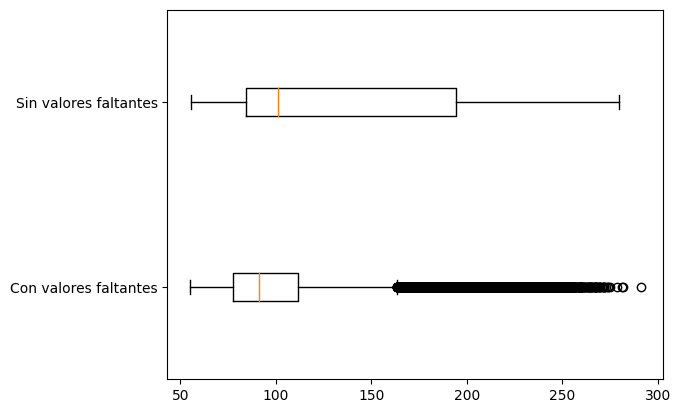

In [ ]:
BM_MV=df.bmi.isna() #devuelve false si los valores no son nulos y true si son nulos
MV_labels=["Con valores faltantes","Sin valores faltantes"] #lista con los titulos del grafico
box_sr=pd.Series(" ",index=BM_MV.unique()) #lista de valores unicos de bm
for poss in BM_MV.unique(): #itera sobre lo valores unicos de BM_MV
  BM = BM_MV == poss  #crea serie booleana donde si  poss es true cada valor va a ser true si el valor en BM_MV es True
  box_sr[poss]=df[BM].avg_glucose_level #se actualiza box_sr donde si poss es true entonces box_sr en la posicion true contendra las temperaturas donde faltan datos
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

Con este grafico comprobamos que el valor la glucosa cambia significativamente entre las dos poblaciones.
Esto muestra que un cambio de glucosa podría haber causado o influido en la aparición de valores faltantes en el BMI.

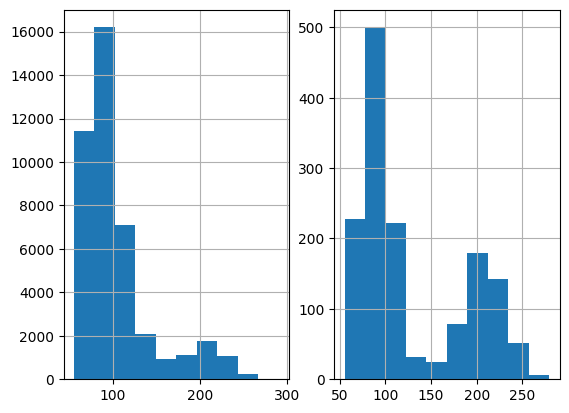

In [ ]:
BM_MV=df.bmi.isna()
glucosa_range=(df.avg_glucose_level.min(),df.avg_glucose_level.max())
MV_labels=["Con valores faltantes","Sin valores faltantes"]
for i, poss in enumerate(BM_MV.unique()):
  plt.subplot(1,2,i+1)
  BM=BM_MV==poss
  df[BM].avg_glucose_level.hist()
  plt.xlim=glucosa_range
  plt.title=MV_labels
plt.show()

Yo no veo mucha diferencia entre los histogramas sino lo borro

In [ ]:
from scipy.stats import ttest_ind
BM_MV=df.bmi.isna()
ttest_ind(df[BM_MV].avg_glucose_level, df[~BM_MV].avg_glucose_level)

TtestResult(statistic=22.3967644477537, pvalue=1.8612238284022242e-110, df=42307.0)

([<matplotlib.axis.YTick at 0x7a9460ea56c0>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

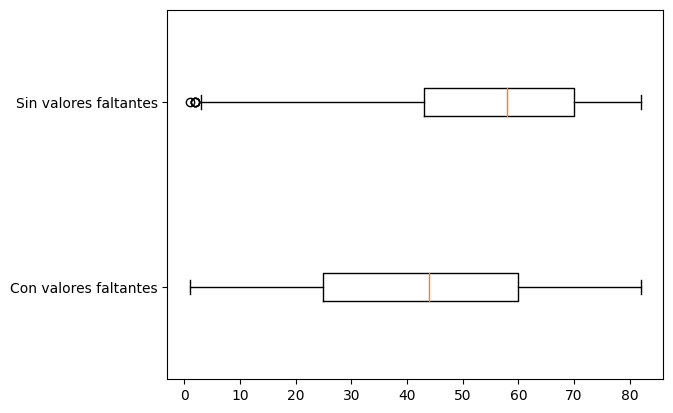

In [ ]:
BM_MV=df.bmi.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].age
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

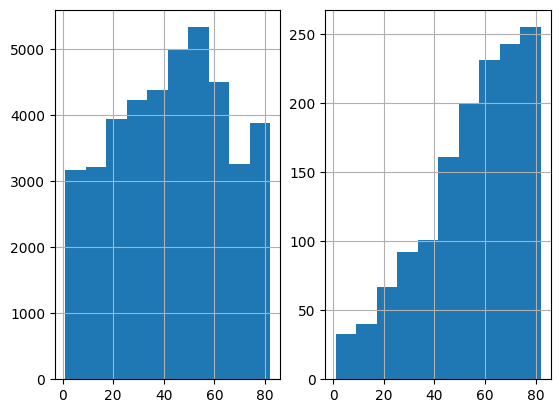

In [ ]:
BM_MV=df.bmi.isna()
edad_range=(df.age.min(),df.age.max())
MV_labels=["Con valores faltantes","Sin valores faltantes"]
for i, poss in enumerate(BM_MV.unique()):
  plt.subplot(1,2,i+1)
  BM=BM_MV==poss
  df[BM].age.hist()
  plt.xlim=edad_range
  plt.title=MV_labels
plt.show()

In [ ]:
from scipy.stats import ttest_ind
BM_MV=df.bmi.isna()
ttest_ind(df[BM_MV].age, df[~BM_MV].age)

TtestResult(statistic=19.847757060812132, pvalue=2.8798903435279614e-87, df=42307.0)

([<matplotlib.axis.YTick at 0x7a94642e7dc0>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

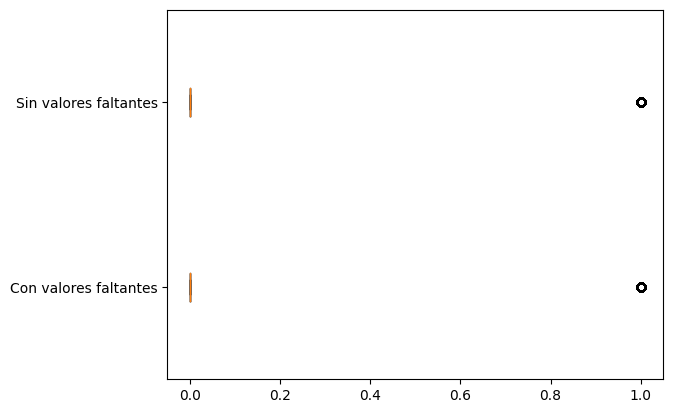

In [ ]:
BM_MV=df.bmi.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].heart_disease
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

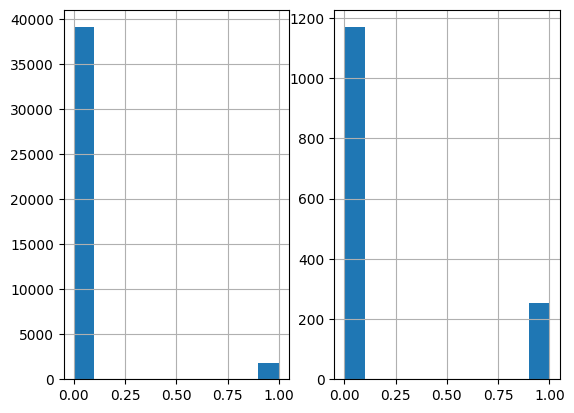

In [ ]:
BM_MV=df.bmi.isna()
hypertension_range=(df.heart_disease.min(),df.heart_disease.max())
MV_labels=["Con valores faltantes","Sin valores faltantes"]
for i, poss in enumerate(BM_MV.unique()):
  plt.subplot(1,2,i+1)
  BM=BM_MV==poss
  df[BM].heart_disease.hist()
  plt.xlim=hypertension_range
  plt.title=MV_labels
plt.show()

([<matplotlib.axis.YTick at 0x7a9460747070>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

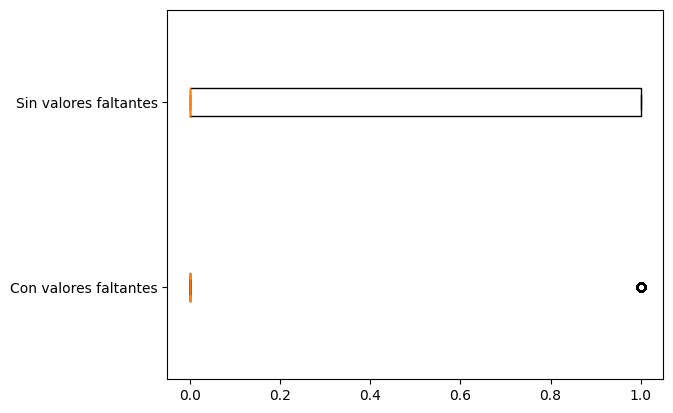

In [ ]:
BM_MV=df.bmi.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].hypertension
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

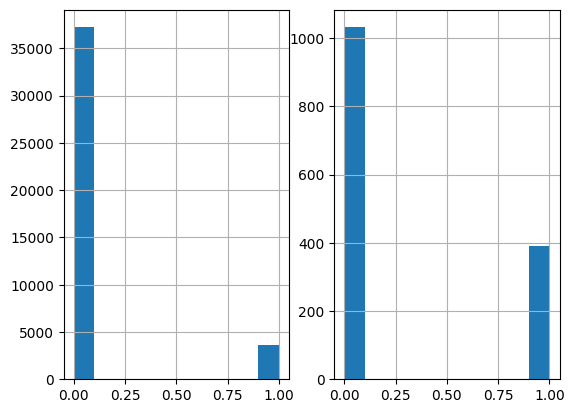

In [ ]:
BM_MV=df.bmi.isna()
hypertension_range=(df.hypertension.min(),df.hypertension.max())
MV_labels=["Con valores faltantes","Sin valores faltantes"]
for i, poss in enumerate(BM_MV.unique()):
  plt.subplot(1,2,i+1)
  BM=BM_MV==poss
  df[BM].hypertension.hist()
  plt.xlim=hypertension_range
  plt.title=MV_labels
plt.show()

borraría de una esto 39, incluso ninguno de estos sufrio un stroke por lo que no es significativo